Dataset shape: (365, 6)
Using target column: Stock_5
Train/Test shapes: (244, 60, 1) (61, 60, 1)


/tmp/ipython-input-3757836395.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].interpolate(inplace=True)
/tmp/ipython-input-3757836395.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.1475 - mae: 0.3406 - val_loss: 0.0392 - val_mae: 0.1622
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0334 - mae: 0.1506 - val_loss: 0.0192 - val_mae: 0.1054
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0275 - mae: 0.1324 - val_loss: 0.0384 - val_mae: 0.1617
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0301 - mae: 0.1245 - val_loss: 0.0191 - val_mae: 0.1100
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0257 - mae: 0.1265 - val_loss: 0.0187 - val_mae: 0.1091
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0202 - mae: 0.1177 - val_loss: 0.0202 - val_mae: 0.1149
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0233 - mae: 0.1196 - val_loss: 0.0190 - val_mae: 0.1112
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0203 - mae: 0.1082 - val_loss: 0.0183 - val_mae: 0.1090
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0187 - mae: 0.1089

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step

===== Evaluation Metrics =====
RMSE       : 1.9354
MAE        : 1.6743
R2 Score   : 0.6920
MAPE (%)   : 1.53
Accuracy (%) : 98.47

Metrics Table:
          Metric      Value
0          RMSE   1.935401
1           MAE   1.674337
2            R2   0.691999
3      MAPE (%)   1.528962
4  Accuracy (%)  98.471038


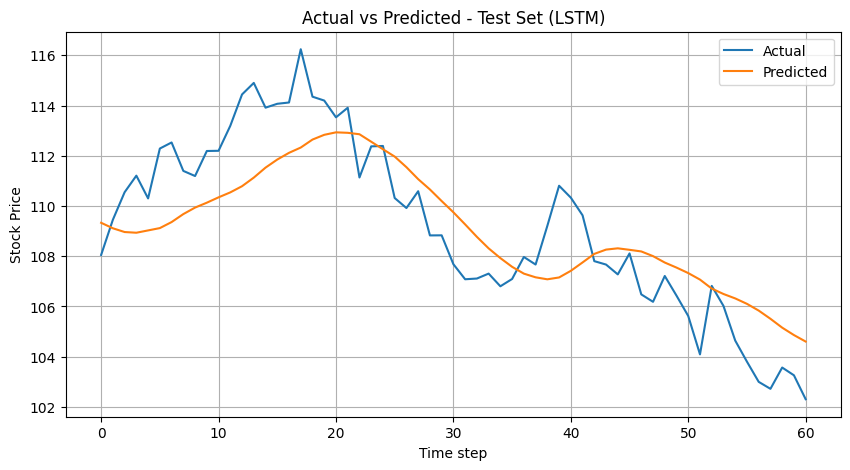

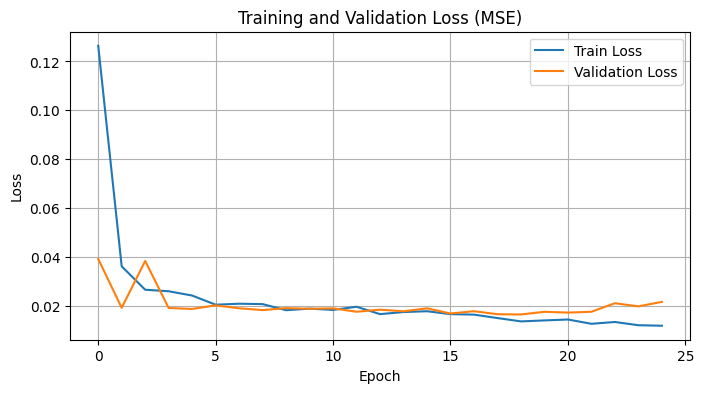


Files saved:
 - lstm_metrics_with_accuracy.csv
 - lstm_last30_predictions.csv
 - lstm_stock_model.h5


In [4]:
# lstm_stock_prediction_with_accuracy.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === CONFIG ===
csv_path = "/content/stock_data.csv"  # change to your CSV path
SEQ_SIZE = 60
TEST_RATIO = 0.2
EPOCHS = 50
BATCH_SIZE = 32
# =============

# Load data
df = pd.read_csv(csv_path)
print("Dataset shape:", df.shape)

# Detect Close column
possible_price_cols = [c for c in df.columns if c.lower() in ['close','adj close','close*','close_price','closep','closeprice']]
if not possible_price_cols:
    possible_price_cols = [c for c in df.columns if 'close' in c.lower()]
target_col = possible_price_cols[0] if possible_price_cols else df.select_dtypes(include=[np.number]).columns[-1]
print("Using target column:", target_col)

# Handle Date column (optional)
date_cols = [c for c in df.columns if 'date' in c.lower()]
if date_cols:
    try:
        df[date_cols[0]] = pd.to_datetime(df[date_cols[0]])
        df.sort_values(by=date_cols[0], inplace=True)
        df.reset_index(drop=True, inplace=True)
        print("Sorted by:", date_cols[0])
    except:
        pass

# Keep only target
data = df[[target_col]].rename(columns={target_col: "Close"})
data['Close'].interpolate(inplace=True)
data['Close'].fillna(method='bfill', inplace=True)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data.values)

# Create sequences
def create_sequences(values, seq_size=60):
    X, y = [], []
    for i in range(len(values) - seq_size):
        X.append(values[i:i+seq_size])
        y.append(values[i+seq_size])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, SEQ_SIZE)
split = int((1 - TEST_RATIO) * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print("Train/Test shapes:", X_train.shape, X_test.shape)

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_split=0.1, callbacks=[es], verbose=1)

# Predictions
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluation metrics
rmse = sqrt(mean_squared_error(y_test_inv, pred))
mae = mean_absolute_error(y_test_inv, pred)
r2 = r2_score(y_test_inv, pred)
mape = np.mean(np.abs((y_test_inv - pred) / y_test_inv)) * 100
accuracy = 100 - mape  # define accuracy

# Print metrics
print("\n===== Evaluation Metrics =====")
print(f"RMSE       : {rmse:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"R2 Score   : {r2:.4f}")
print(f"MAPE (%)   : {mape:.2f}")
print(f"Accuracy (%) : {accuracy:.2f}")

# Tabular summary
metrics = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R2", "MAPE (%)", "Accuracy (%)"],
    "Value": [rmse, mae, r2, mape, accuracy]
})
print("\nMetrics Table:\n", metrics)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(pred, label='Predicted')
plt.title('Actual vs Predicted - Test Set (LSTM)')
plt.xlabel('Time step')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



# Save files
metrics.to_csv("lstm_metrics_with_accuracy.csv", index=False)
sample_df.to_csv("lstm_last30_predictions.csv", index=False)
model.save("lstm_stock_model.h5")

print("\nFiles saved:")
print(" - lstm_metrics_with_accuracy.csv")
print(" - lstm_last30_predictions.csv")
print(" - lstm_stock_model.h5")
